In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
df = pd.read_excel("C:/Users/Ansh/Desktop/CMC/Dataset/competitive_prep_dataset_python.xlsx")

In [22]:
df.head()

,Date,Study_Hours(0-8),Concentration_Score(1-10),Questions_Practiced,Questions_Correct,Accuracy(%),Productivity_Score,Sleep_Hours(0-12),Breaks_Taken(0-5),Distractions_Minutes(0-60),Revision_Time(0-4),Topics_Covered(1-5),Mood_Score(1-10),Meditation_Minutes(0-30),Physical_Activity_Minutes(0-60)
0,2023-07-19 00:00:00,4.75,5,30,22,73.33,87.17,7.41,5,15,1.42,3,4,17,55
1,2023-07-20 05:51:10,3.79,4,31,24,77.42,73.38,7.17,2,11,2.30,1,9,0,37
2,2023-07-21 05:51:10,4.97,10,39,34,87.18,117.14,6.88,5,51,1.01,1,2,18,2
3,2023-07-22 05:51:10,6.28,2,49,39,79.59,88.72,6.71,1,4,0.43,4,5,21,37
4,2023-07-23 05:51:10,3.65,3,48,32,66.67,64.83,7.91,1,33,1.36,5,4,28,15


In [23]:
df = df.drop(columns=['Date'])

In [24]:
X = df.drop(columns=['Accuracy(%)'])  # Features
y = df['Accuracy(%)']                 # Target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.95
Mean Absolute Error: 1.49


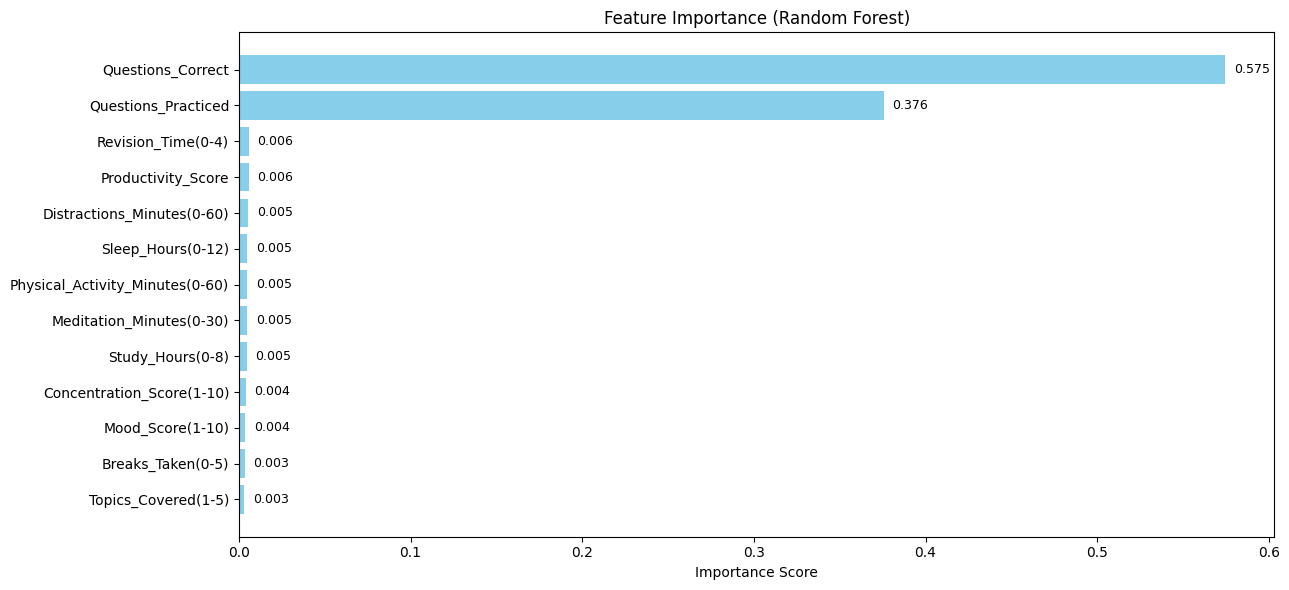

In [39]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values()
plt.figure(figsize=(13, 6))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')

for bar in bars:
    plt.text(bar.get_width() + 0.005, 
             bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.3f}',
             va='center', fontsize=9)

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

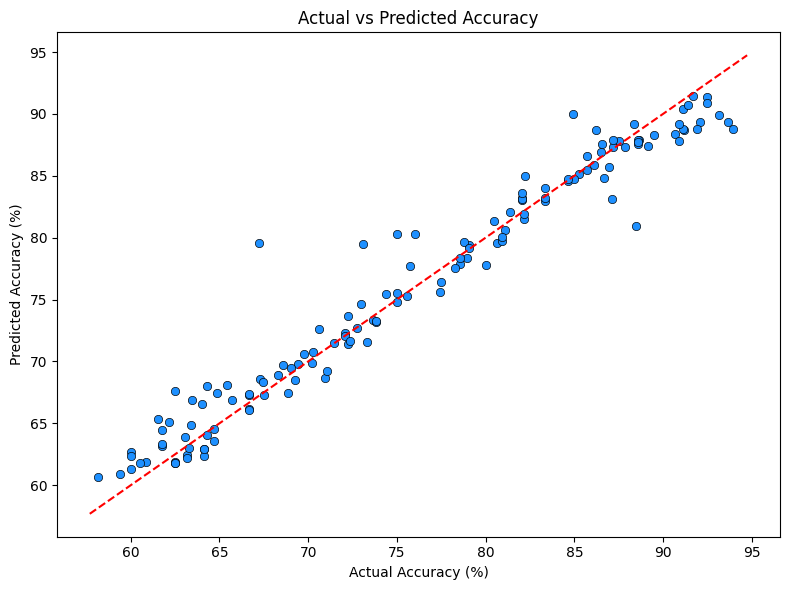

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel("Actual Accuracy (%)")
plt.ylabel("Predicted Accuracy (%)")
plt.title("Actual vs Predicted Accuracy")
plt.tight_layout()
plt.show()

| S.No | Feature                               | Insight                                                                   |
| ------: | ---------------------------------------- | ---------------------------------------------------------------------------- |
|     1️ | **Questions\_Correct**                   | Direct driver of Accuracy (%). More correct answers = better accuracy.       |
|     2️ | **Study\_Hours**                         | Strong predictor. Consistent, focused study time helps improve accuracy.     |
|     3️ | **Concentration\_Score**                 | High concentration significantly boosts effectiveness of study sessions.     |
|     4️ | **Sleep\_Hours**                         | Adequate sleep positively affects memory, focus, and performance.            |
|     5️ | **Distractions\_Minutes**                | More distractions lower accuracy. Reducing them can yield better outcomes.   |
|     6️ | **Mood\_Score**                          | A better mood may enhance learning and recall during study sessions.         |
|     7️ | **Breaks\_Taken**                        | Short, timed breaks help avoid burnout; too many can hurt focus.             |
|     8️ | **Physical\_Activity\_Minutes**          | Indirectly improves mental clarity, stamina, and reduces stress.             |
|     9️ | **Meditation\_Minutes**                  | Helps with focus and emotional regulation — supports consistent performance. |
|     10 | **Revision\_Time** / **Topics\_Covered** | Quality revision matters more than quantity; targeted review helps.          |
